# **LetsGrowMore - Internship**

**Advance Level (Task-2)** 

 Author- Ashish

# **Emotion Detector using Machine Learning and Song Recommender**

This project is divided into two parts :-

1. Creating an image classifier using AlexNet architecture by using the given data.
2. Using the trained model to output a song based on the emotions of the image.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

# 1. Preparing the Datasets

In [2]:
train_dir = "../input/emotion-detection-fer/train" #passing the path with training images
test_dir = "../input/emotion-detection-fer/test"   #passing the path with testing images

In [3]:
img_size = 48 #original size of the image

Exploring Dataset

In [18]:
#counting the number of images of each type
Number_of_images = {}
def count_img(path, type):
    for emotion in os.listdir(path):
        dir = path +'/' + emotion
        Number_of_images[emotion] = len(os.listdir(dir))
    df = pd.DataFrame(Number_of_images, index = [type])
    return df

print(count_img(train_dir, 'train'))
print(count_img(test_dir, 'test'))

       fearful  disgusted  angry  neutral   sad  surprised  happy
train     4097        436   3995     4965  4830       3171   7215
      fearful  disgusted  angry  neutral   sad  surprised  happy
test     1024        111    958     1233  1247        831   1774


<AxesSubplot:>

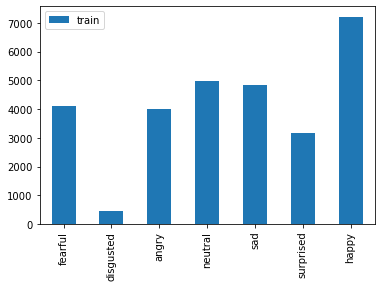

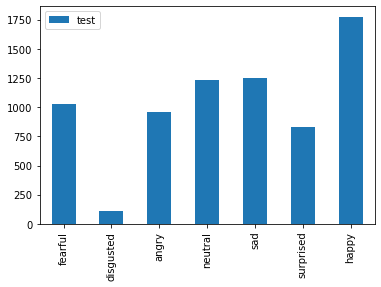

In [19]:
#Ploting the values
count_img(train_dir, 'train').transpose().plot(kind = 'bar')
count_img(test_dir, 'test').transpose().plot(kind = 'bar')

Creating Training and test sets

In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


# 2.Model Building

In [7]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [8]:
epochs = 60
batch_size = 64

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

# 3.Training the Model

In [10]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 103s 275ms/step - loss: 9.5762 - accuracy: 0.1788 - val_loss: 8.4811 - val_accuracy: 0.2451
Epoch 2/60
359/359 [==============================] - 26s 72ms/step - loss: 8.4323 - accuracy: 0.2277 - val_loss: 7.4416 - val_accuracy: 0.2807
Epoch 3/60
359/359 [==============================] - 26s 71ms/step - loss: 7.3736 - accuracy: 0.2552 - val_loss: 6.4047 - val_accuracy: 0.3212
Epoch 4/60
359/359 [==============================] - 26s 72ms/step - loss: 6.3749 - accuracy: 0.2711 - val_loss: 5.4249 - val_accuracy: 0.3729
Epoch 5/60
359/359 [==============================] - 26s 73ms/step - loss: 5.4556 - accuracy: 0.3063 - val_loss: 4.7698 - val_accuracy: 0.3666
Epoch 6/60
359/359 [==============================] - 26s 72ms/step - loss: 4.6773 - accuracy: 0.3340 - val_loss: 4.1786 - val_accuracy: 0.3722
Epoch 7/60
359/359 [==============================] - 26s 72ms/step - loss: 4.0095 - accuracy: 0.3709 - val_loss: 3.4664 - val_accurac

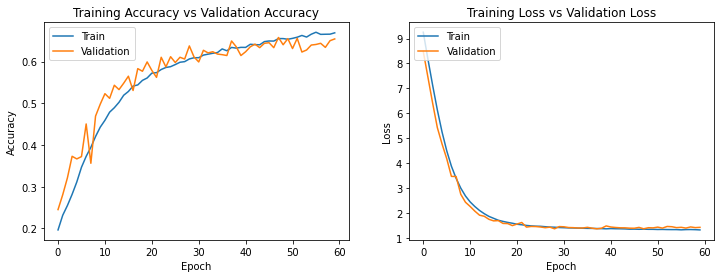

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
model.save('classifier.h5')

In [20]:
#Loading the saved model
Emotion_classifier = tf.keras.models.load_model('./classifier.h5')

# 4. Creating the Song recommender based on the model

Simplifying some of the tasks that come with creating new music, I went ahead and downloaded some songs from the internet that correspond to each of the seven emotions and created a directory with each emotion directory containing one song.

In [25]:
label_dict = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

In [45]:
# a method that takes img_address and outputs emotion using model
def image_to_emotion(img_address):
    img = image.load_img(img_address,target_size = (48,48),color_mode = "grayscale")
    img = np.array(img)
    img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
    img = img.reshape(1,48,48,1)
    result =Emotion_classifier.predict(img)
    result = list(result[0])
    img_index = result.index(max(result))
    return label_dict[img_index]

In [47]:
image_to_emotion('../input/fer2013/test/fear/PrivateTest_10306709.jpg')

'fear'

In [48]:
#Storing song dictionary storing in the song paths given the emotion
cropped_image_dirs = []
song_names_dict = {}
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
location = '../input/songs-dataset/Songs'
for emotion in emotions:
    filepath = location + "/" + emotion 
    song_names_dict[emotion] = []
    for entry in os.scandir(filepath):
        if entry.is_file():
            song_names_dict[emotion].append(entry.path.replace("\\", "/"))
song_names_dict

FileNotFoundError: [Errno 2] No such file or directory: '../input/songs-dataset/Songs/angry'

In [ ]:
#Creating a basic music player method
import pyglet
def play_song(emotion):
    music = pyglet.media.load(song_names_dict[emotion][0])
    music.play()
    pyglet.app.run()

In [ ]:
#playing the song
play_song(image_to_emotion('../input/fer2013/test/surprise/PrivateTest_10072988.jpg'))